In [1]:
#Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics

import os
os.chdir (r"D:\anaconda\ashok\Project\UnsupervisedLearning")
import warnings
warnings.filterwarnings('ignore')

## 1. Data pre-processing

In [2]:
# Loading Dataset - Reading the data as a data frame
df = pd.read_csv('vehicle.csv')
print (df)

     compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0        

In [3]:
# Finding Shape of data
# Inference : There are 846 rows and 19 columns of data
df.shape

(846, 19)

In [4]:
# Finding Type
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
# Viewing first 10 rows of data
df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [6]:
#Label Encoding the class variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder() 
columns = df.columns
print(columns)
df['class'] = le.fit_transform(df['class'])
df.shape

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


(846, 19)

In [7]:
# Viewing first 10 rows of data after label encoding the class variable
df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0        

##### Performing EDA in below steps:
1. Finding any Missing Values <br />
2. Finding Outliers <br />
3. Understanding attributes using descriptive statistics <br />
4. Visualizing attribute distribution using univariate and multivariate analysis <br />
5. Finding attribute correlation and analysing which attribute is more important <br />

In [8]:
# Checking presence of missing values
df.isna().apply(pd.value_counts)

compactness  circularity  distance_circularity  radius_ratio  \
False        846.0          841                   842           840   
True           NaN            5                     4             6   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   844                    846.0            845   
True                      2                      NaN              1   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            845                     843                      846.0   
True               1                       3                        NaN   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              843                844                        844   
True                 3                  2                          2   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          842             840               845   
True                             4               6                 1   

       skewness_about.2  hollows_ratio  class  
False               845          846.0  846.0  
True                  1            NaN    NaN

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

##### Inference:
1. class, hollows_ratio,max.length_rectangularity,max.length_aspect_ratio, compactness has no missing values rest all features are having some kind of missing values </br>
2.  All attributes are of numerical type

In [10]:
# Finding and treating missing values
from sklearn.impute import SimpleImputer

newdf = df.copy()

X = newdf.iloc[:,0:19] #separting all numercial independent attribute
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns = column )
newdf.describe().T

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

In [11]:
# Checking the results after imputing missing values
print("Original null value count:\n", df.isnull().sum())
print("\n\nCount after imputing null values:\n", newdf.isnull().sum())

Original null value count:
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


Count after imputing null values:
 compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         

##### The data pre-processing is completed and ready to be fed to an Unsupervised algorithm

## 2. Understanding attributes in the given dataset

Univariate Analysis is done to understand the attributes in given dataset. Then, Bivariate analysis is performed to find the relationship between attributes

Below steps are followed:
1. Quick descriptive statistics to make some meaningful sense of data </br>
2. Plotting univariate distribution </br>
3. Finding outliers & skewness in data series </br>
4. Treating outliers </br>
5. Performing Correlation Analysis using heatmap </br>
6. Plotting Bivariate distribution </br>

In [12]:
# Descriptive Statistics Summary of dataframe after imputing null values
newdf.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

In [13]:
# Finding shape of dataframe after imputing null values
newdf.shape

(846, 19)

##### Observations based on Descriptive Stats: 
1. compactness has mean and median values almost similar , it signifies that it is normally distribited and has no skewness/outlier
2. circularity : it also seems to be normally distribted as mean amd median has similar values
3. scatter_ratio feature seems to have some kind of skewness and outlier

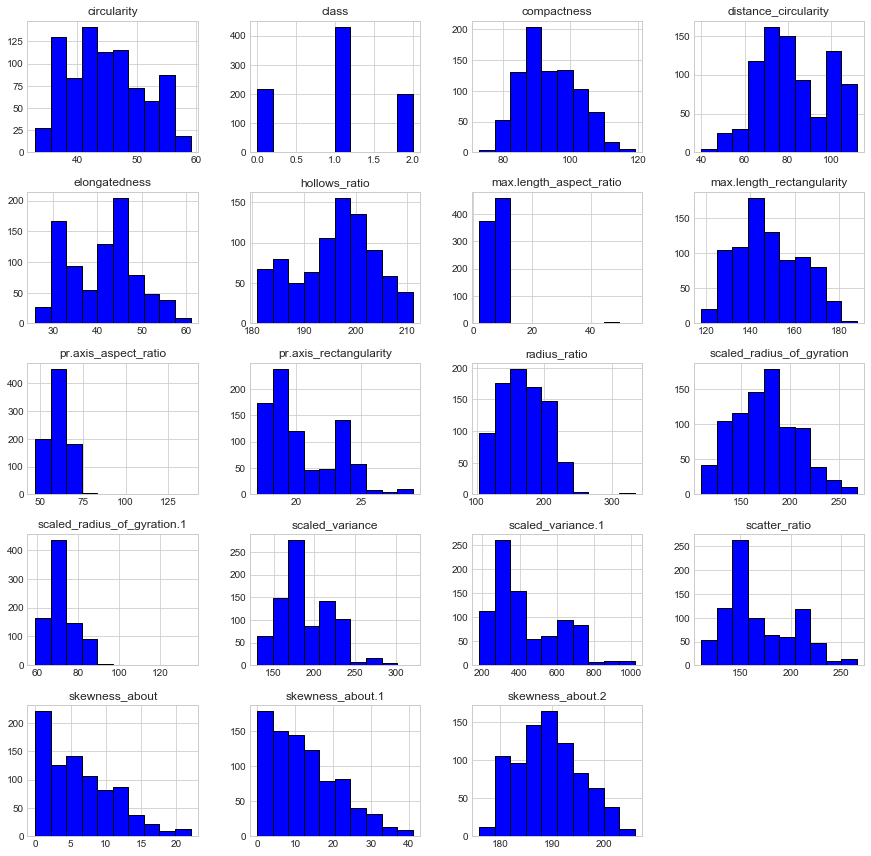

In [14]:
#Ploting histogram to check that if data columns are normal or almost normal or not
plt.style.use('seaborn-whitegrid')

newdf.hist(figsize=(15,15), color='blue', edgecolor = 'black')
plt.show()

##### Observations:

1. Most of the data attributes seems to be normally distributed
2. scaled_variance.1 and skewness_about, skewness_about.1, scatter_ratio seems to be right skewed


In [15]:
# Measuring skewness
newdf.skew(axis = 0, skipna = True)

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64

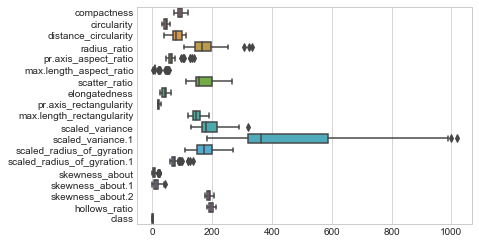

In [16]:
#Summary View of all attributes using boxplot
ax = sns.boxplot(data=newdf, orient="h")

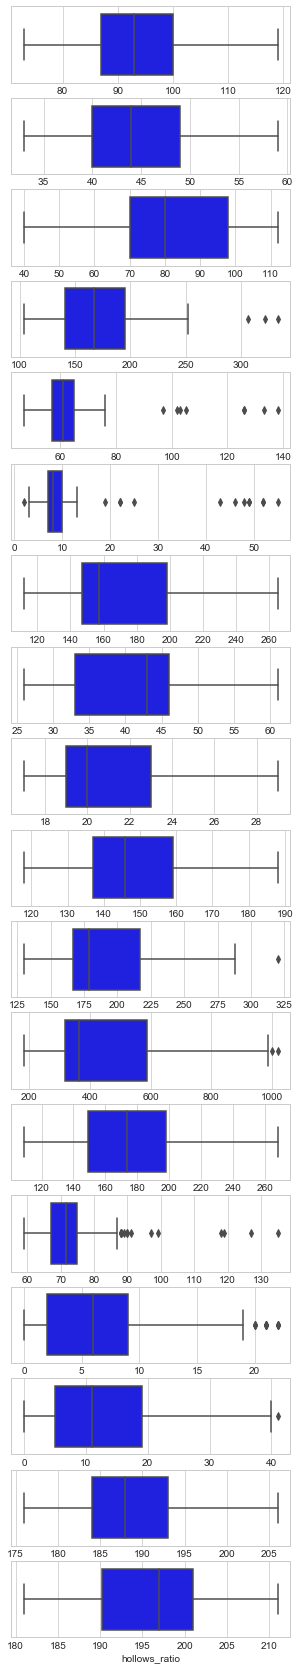

In [17]:
# Box Plot to check outliers
plt.figure(figsize= (5,30))

plt.subplot(18,1,1)
sns.boxplot(x= newdf['compactness'], color='blue')

plt.subplot(18,1,2)
sns.boxplot(x= newdf['circularity'], color='blue')

plt.subplot(18,1,3)
sns.boxplot(x= newdf['distance_circularity'], color='blue')

plt.subplot(18,1,4)
sns.boxplot(x= newdf['radius_ratio'], color='blue')

plt.subplot(18,1,5)
sns.boxplot(x= newdf['pr.axis_aspect_ratio'], color='blue')

plt.subplot(18,1,6)
sns.boxplot(x= newdf['max.length_aspect_ratio'], color='blue')

plt.subplot(18,1,7)
sns.boxplot(x= newdf['scatter_ratio'], color='blue')

plt.subplot(18,1,8)
sns.boxplot(x= newdf['elongatedness'], color='blue')

plt.subplot(18,1,9)
sns.boxplot(x= newdf['pr.axis_rectangularity'], color='blue')

plt.subplot(18,1,10)
sns.boxplot(x= newdf['max.length_rectangularity'], color='blue')

plt.subplot(18,1,11)
sns.boxplot(x= newdf['scaled_variance'], color='blue')

plt.subplot(18,1,12)
sns.boxplot(x= newdf['scaled_variance.1'], color='blue')

plt.subplot(18,1,13)
sns.boxplot(x= newdf['scaled_radius_of_gyration'], color='blue')

plt.subplot(18,1,14)
sns.boxplot(x= newdf['scaled_radius_of_gyration.1'], color='blue')

plt.subplot(18,1,15)
sns.boxplot(x= newdf['skewness_about'], color='blue')

plt.subplot(18,1,16)
sns.boxplot(x= newdf['skewness_about.1'], color='blue')

plt.subplot(18,1,17)
sns.boxplot(x= newdf['skewness_about.2'], color='blue')

plt.subplot(18,1,18)
sns.boxplot(x= newdf['hollows_ratio'], color='blue')

plt.show()

##### Observations on Box Plots:
radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance,scaled_variance.1,  scaled_radius_of_gyration.1, skewness_about, skewness_about.1 are the attributes with outliers which is visible with all dotted points

In [18]:
# Treating outliers with IQRs
from scipy.stats import iqr

Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [19]:
# Since number of outliers are less, all the attributes which had outliers have been treated and removed. 
cleandf = newdf[~((newdf < (Q1 - 1.5 * IQR)) |(newdf > (Q3 + 1.5 * IQR))).any(axis=1)]

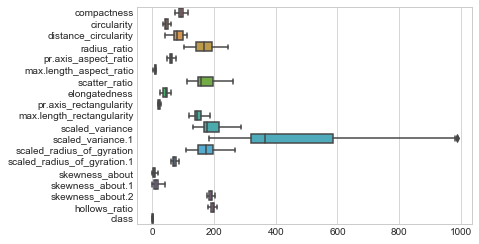

In [20]:
# Plotting the Box Plot to check whether outliers are removed
ax = sns.boxplot(data=cleandf, orient="h")

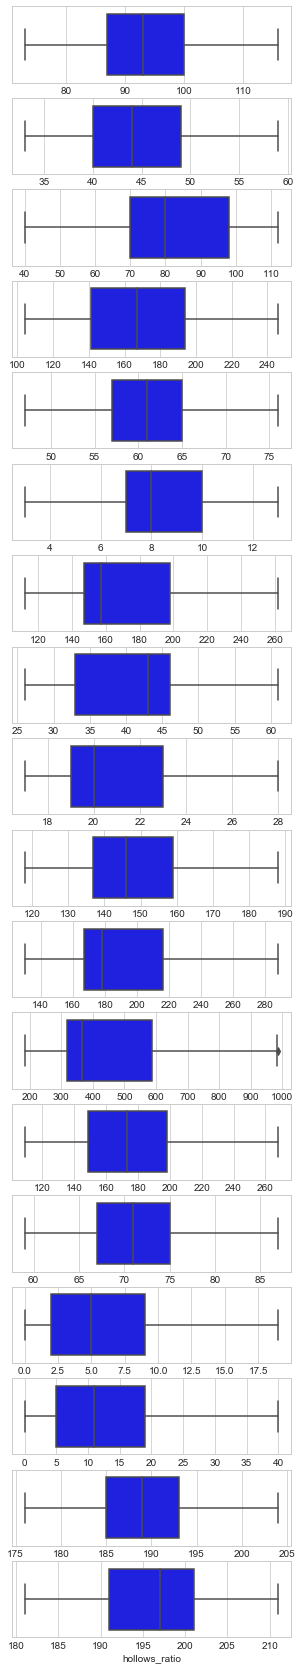

In [21]:
# Box Plot after removing outliers
plt.figure(figsize= (5,30))

plt.subplot(18,1,1)
sns.boxplot(x= cleandf['compactness'], color='blue')

plt.subplot(18,1,2)
sns.boxplot(x= cleandf['circularity'], color='blue')

plt.subplot(18,1,3)
sns.boxplot(x= cleandf['distance_circularity'], color='blue')

plt.subplot(18,1,4)
sns.boxplot(x= cleandf['radius_ratio'], color='blue')

plt.subplot(18,1,5)
sns.boxplot(x= cleandf['pr.axis_aspect_ratio'], color='blue')

plt.subplot(18,1,6)
sns.boxplot(x= cleandf['max.length_aspect_ratio'], color='blue')

plt.subplot(18,1,7)
sns.boxplot(x= cleandf['scatter_ratio'], color='blue')

plt.subplot(18,1,8)
sns.boxplot(x= cleandf['elongatedness'], color='blue')

plt.subplot(18,1,9)
sns.boxplot(x= cleandf['pr.axis_rectangularity'], color='blue')

plt.subplot(18,1,10)
sns.boxplot(x= cleandf['max.length_rectangularity'], color='blue')

plt.subplot(18,1,11)
sns.boxplot(x= cleandf['scaled_variance'], color='blue')

plt.subplot(18,1,12)
sns.boxplot(x= cleandf['scaled_variance.1'], color='blue')

plt.subplot(18,1,13)
sns.boxplot(x= cleandf['scaled_radius_of_gyration'], color='blue')

plt.subplot(18,1,14)
sns.boxplot(x= cleandf['scaled_radius_of_gyration.1'], color='blue')

plt.subplot(18,1,15)
sns.boxplot(x= cleandf['skewness_about'], color='blue')

plt.subplot(18,1,16)
sns.boxplot(x= cleandf['skewness_about.1'], color='blue')

plt.subplot(18,1,17)
sns.boxplot(x= cleandf['skewness_about.2'], color='blue')

plt.subplot(18,1,18)
sns.boxplot(x= cleandf['hollows_ratio'], color='blue')

plt.show()

In [22]:
'''
Dropping Class column and see the correlation Matrix & Pairplot Before using this dataframe for PCA 
as PCA should only be perfromed on independent attribute
'''
cleandf= newdf.drop('class', axis=1)
cleandf.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

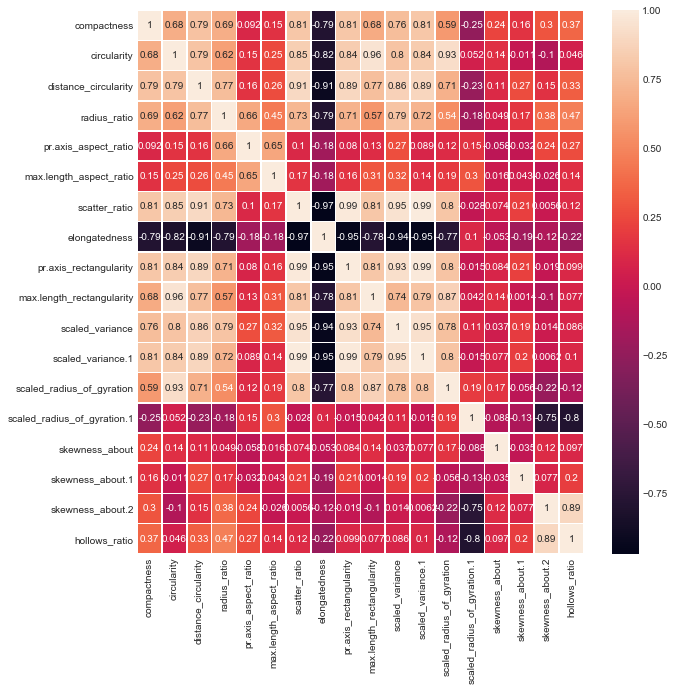

In [23]:
'''
Using Pearson Correlation Coefficient to see what all attributes are linearly related and also visualize the same
in the seaborns scatter plot
'''
fig, axs = plt.subplots(figsize=(10,10))        
sns.heatmap(cleandf.corr(), annot=True, linewidths=.8, ax=axs)

##### Inferences from Heat Map
  1. scaled Variance and scaled variance.1 are strongly correlated with correlation coeff: 0.95
  2. skewness_about.2 and hollows_ratio are strongly correlated with correlation coeff: 0.89
  3. distance_circularity and radius_ratio are having positive correlation with corr coeff: 0.77
  4. compactness and circularity are averagely correlated with coeff: 0.68
  5. radius_ratio and pr.axis_aspect_ratio are averagely correlated with coeff: 0.66
  6. scaled _variance and scaled_radius_of_gyration are highly correlated with corr coeff: 0.78
  7. circularity & distance_circularity are highly correlated with corr coeff: 0.79
  8. pr.axis_rectangularity and max.length_rectangularity are strongly correlated with coeff: 0.81 
  9. scatter_ratio and elongatedness seems to be have strong negative correlation val : -0.97
  10. elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  0.95
      
  11. max_length_aspect_ratio and radius_ratio have average correlation 
  12. pr.axis_aspect_ratio and max_length_aspect_ratio have very little correlation
  13. scaled_radius_gyration and scaled_radius_gyration.1 have very little correlated
  14. scaled_radius_gyration.1 and skewness_about are very little correlated
  15. skewness_about and skewness_about.1 are correlated
  16. skewness_about.1 and skewness_about.2 are not correlated

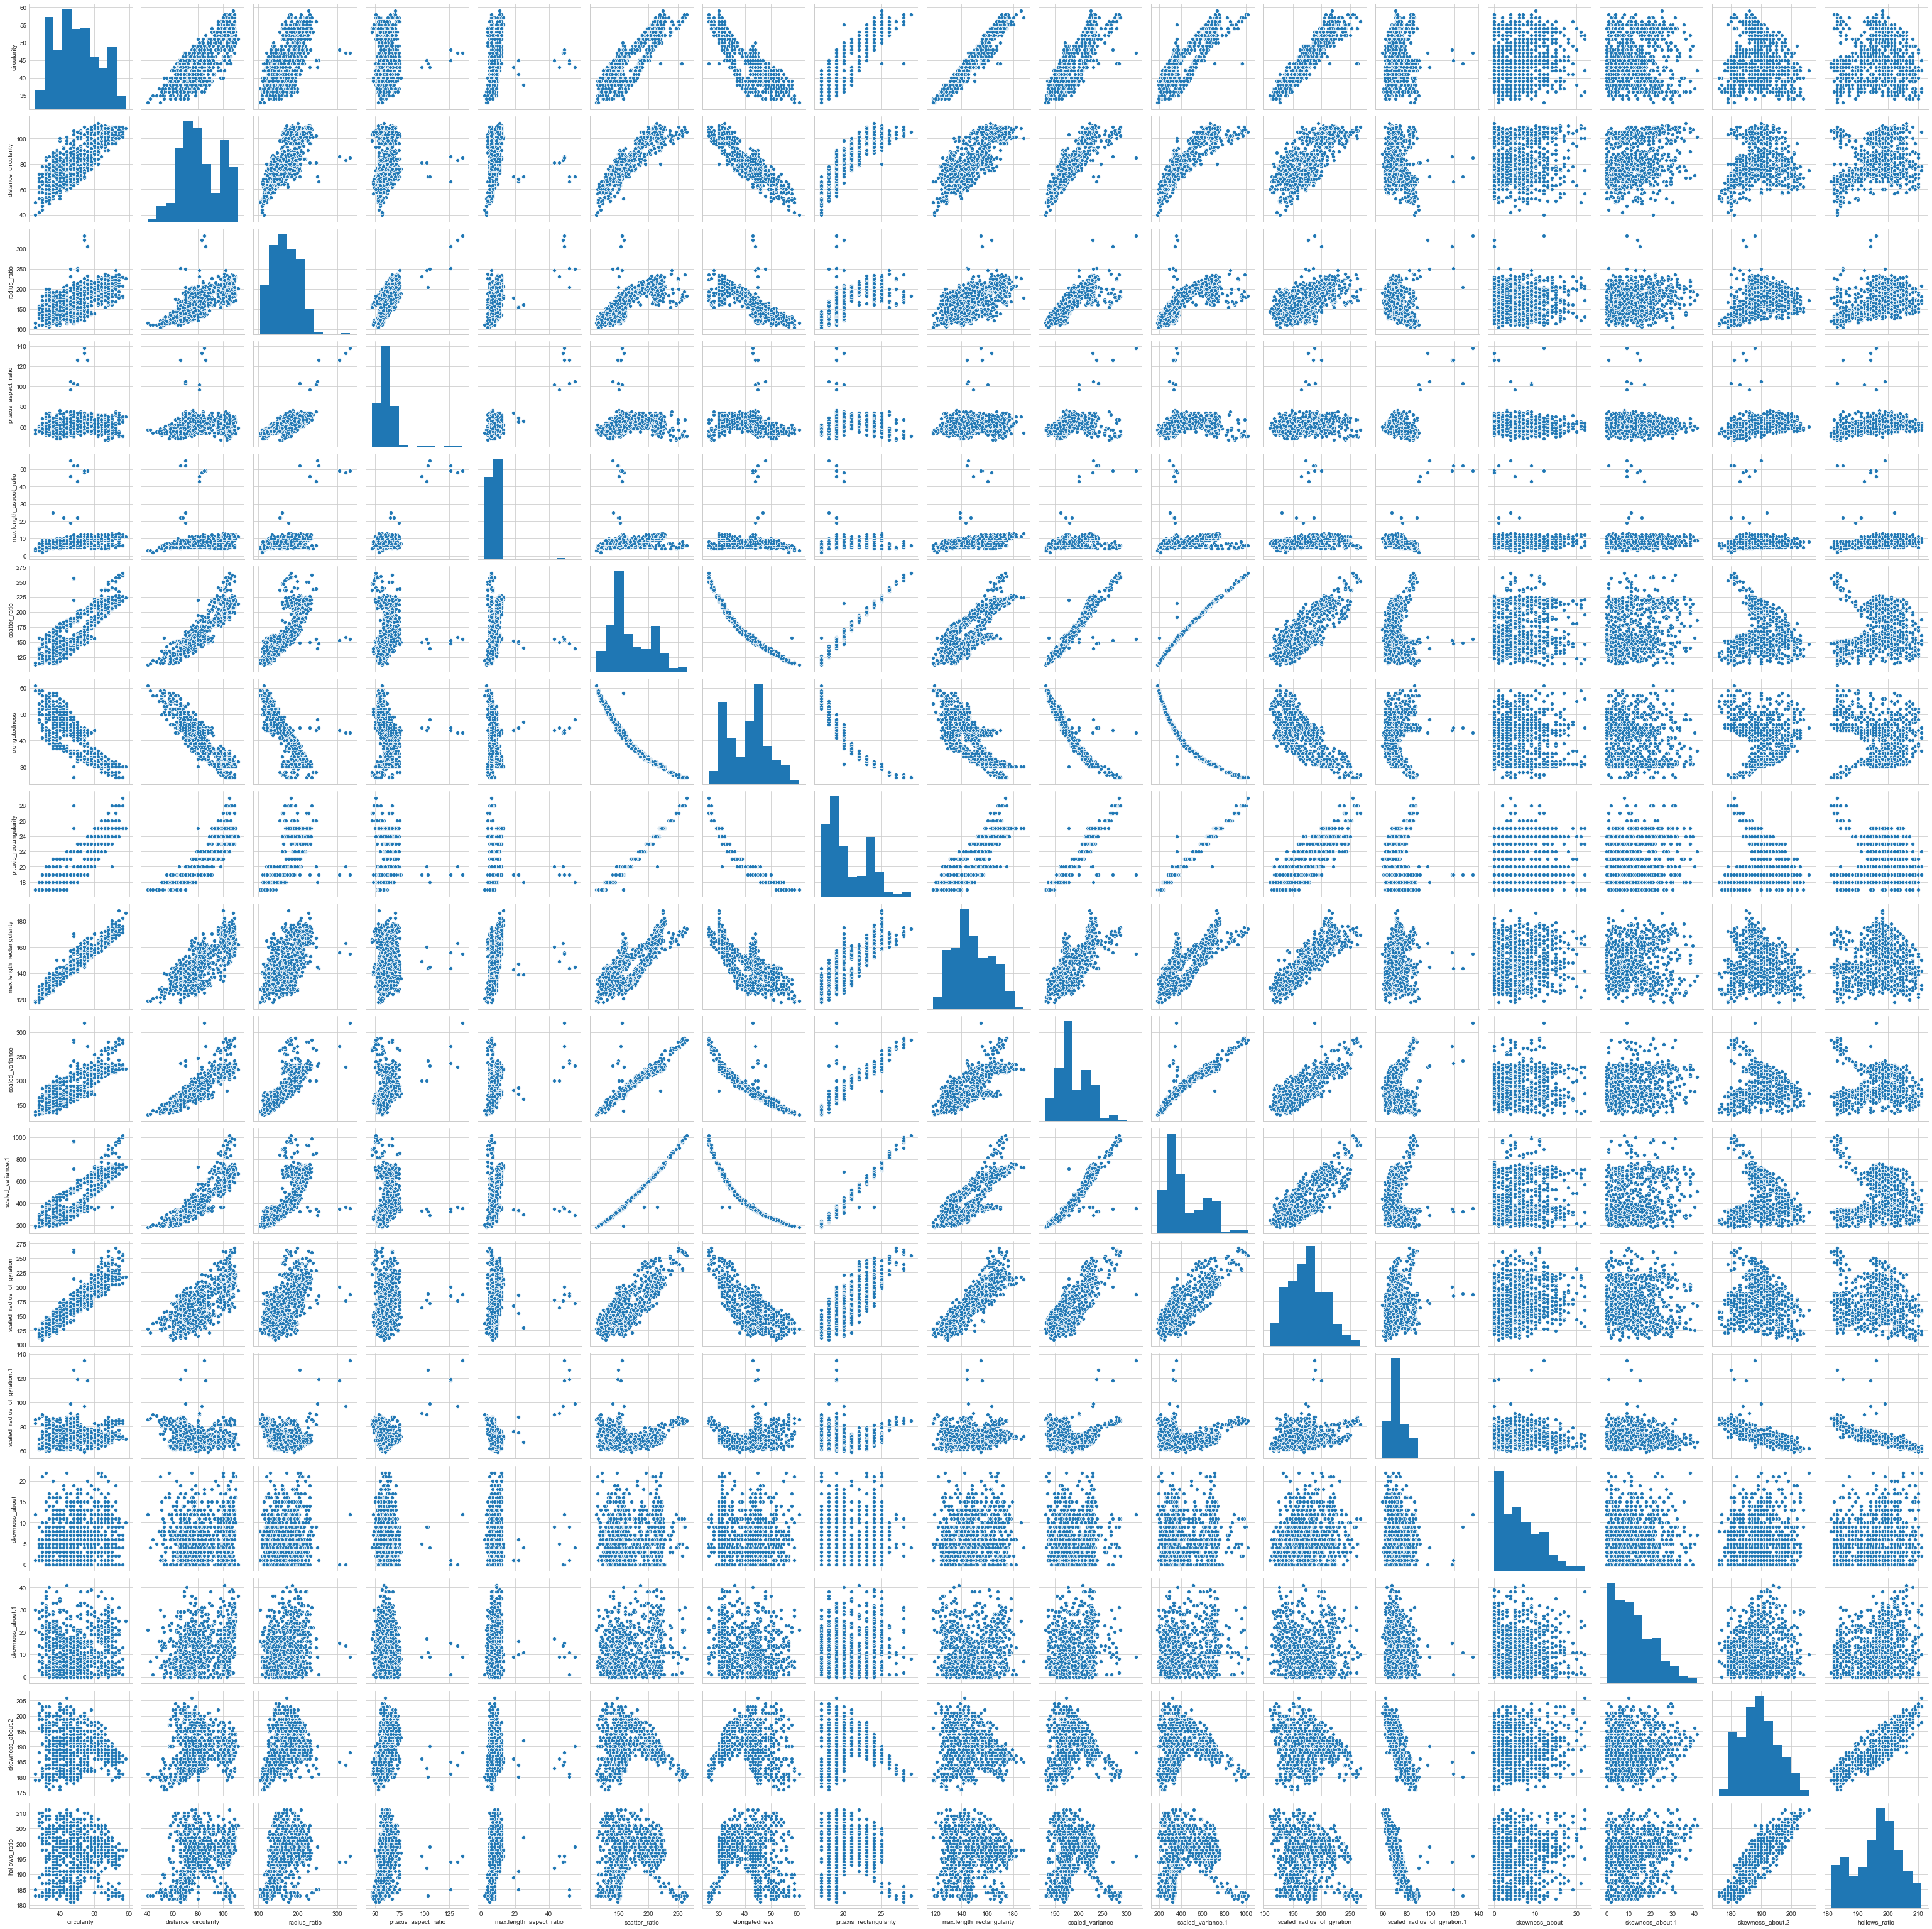

In [24]:
# Pair Plot
sns.pairplot(cleandf.iloc[:,1:])

##### Observations from Pair Plot
1. Pair Plot validated same results as observed in heatmap
2. scaled variance and scaled variance.1 have very strong positive correlation 
3. skewness_about_2 and hollow_ratio also have strong positive correation
4. scatter_ratio and elongatedness have very strong negative correlation 
5. elongatedness and pr.axis_rectangularity have strong negative correlation

scaled variance and scaled variance.1 ; elongatedness and pr.axis_rectangularity are strongly correlated. Hence, they need to be dropped or treated carefully before model building

##### Choosing the right attributes for model building

1. Our objective is to identify the vehicle based on input features. Hence, our main assumption is there is little or no multicollinearity between the features

2. From above correlation matrix, we could find that there are features with more than 0.9 correlation. so we can decide to get rid of these columns whose correlation is +-0.9 or above.There are 8 such columns:
    - max.length_rectangularity
    - scaled_radius_of_gyration
    - skewness_about.2
    - scatter_ratio
    - elongatedness
    - pr.axis_rectangularity
    - scaled_variance
    - scaled_variance.1

3. Another observation is more than 50 % of attributes are highly correlated. The easiest way to deal with Multicolleniarity is to delete or eliminate one of the perfectly correlated features. (Ex: Scaled Variance & Scaled Variance.1 are having strong positive correlation; One can be picked and another one can be dropped.Similarly , elongatedness and pr.axis_rectangularity we can pick one as they have very strong negative correlation). This approach can be used to select the feature we want to carry forward for model analysis. 

However, there is a better approach called PCA - Principle Component Analysis which can be used for dimensions reduction

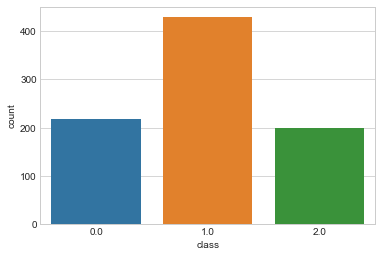

In [25]:
#ploting the count of the target variable
sns.countplot(newdf['class']) 
plt.show()

## 3. Spliting the dataset into training and test set in the ratio of 70:30


In [26]:
array = newdf.values
X = array[:,0:18] # select all rows and first 18 columns which are the attributes
Y = array[:,18]   # select all rows and the 19th column which is the class variable
test_size = 0.30 # taking 70:30 training and test set

# Scaling of independent variable data using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=test_size, random_state=1) # To set the random state
type(X_train)

numpy.ndarray

## 4. Training a Support Vector Machine

In [27]:
svc = SVC() #instantiate the object
#fit the model on orighinal raw data
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
#predict the y value
Orig_y_predict = svc.predict(X_test)

In [29]:
print("Model Score On Original Data - training dataset ",svc.score(X_train, y_train))
print("Model Score On Original Data - test dataset ",svc.score(X_test, y_test))

print("Accuracy Score On Original Data",accuracy_score(y_test, Orig_y_predict))

Model Score On Original Data - training dataset  0.972972972972973
Model Score On Original Data - test dataset  0.952755905511811
Accuracy Score On Original Data 0.952755905511811


In [30]:
print(metrics.confusion_matrix(y_test, Orig_y_predict))

[[ 58   0   1]
 [  1 129   3]
 [  6   1  55]]


#### Observation
Accuracy on test data set using support vector machine on original data is 0.952755905511811

## 5. Performing K-fold cross validation and getting cross validation score for the model

In [31]:
from sklearn.model_selection import KFold

scores = []
best_svc = SVC(kernel='rbf')
cv = KFold (n_splits=10, random_state=1, shuffle=False)

for train_index, test_index in cv.split(X_std):
   
    X_train, X_test, y_train, y_test = X_std[train_index], X_std[test_index], Y[train_index], Y[test_index]
    best_svc.fit(X_train, y_train)
    scores.append(best_svc.score(X_test, y_test))
    
print(scores)


[0.9411764705882353, 0.9647058823529412, 0.9529411764705882, 0.9882352941176471, 0.9647058823529412, 0.9764705882352941, 0.9880952380952381, 0.9642857142857143, 0.9523809523809523, 0.9642857142857143]


##### Observation
The cross validation scores on test data of original dataset (raw data) after performing K-fold cross validation for K=10 is as shown above. </br> 

The minimum accuracy score is 0.9411764705882353 and maximum accuracy score is 0.9882352941176471

##  6.Using PCA , extracting Principal Components that capture about 95% of the variance in the data

##### Principal Components Analysis is done using below steps
    - Split our data into train and test data set (already performed in section-3 above)
    - normalize the training set using standard scalar (already performed in section-3 above)
    
    - Create the covariance matrix
    - Calculate the eigenvectors and their eigenvalues
    - Sort the eigenvectors according to their eigenvalues in descending order
    - Choose the first K eigenvectors (K - required dimension)
    - Build new dataset with reduced dimensionality

In [32]:
# Creating covariance matrix
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  

In [33]:
# Calculating Eigen Vectors & Eigen Values: Using numpy linear algebra function
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

In [34]:
# Sorting eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

#  print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)


[(9.404602609088705, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.014922058524633, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389657, array([ 0.11992248,  0.02482055,  0.05601433, -0.27507421, -0.64201297,
       -0.5918013 ,  0.09762831, -0.05764844,  0.10951242,  0.0170642 ,
       -0.05632398,  0.10884073,  0.03146365, -0.28627701,  0.11567935,
        0.07528289, -0.00873592, -0.03952427])), (1.1799374684450215, array([-0.07838436, -0.18733741,  0.07120084,  0.04260534, -0.03272571,
       -0.03141473,  0.09574857, -0.0822902 ,  0.0

In [35]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

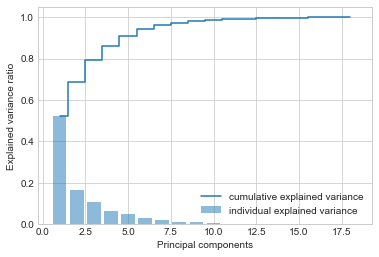

In [36]:
# Plotting The Explained Variance and Principal Components
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

##### Observation
1. From above plot, it is clear that 8 dimensions are able to explain 95% variance of data
2. Hence, First 8 principal components can be used going forward to calculate the reduced dimensions

##### Dimensionality Reduction
    - 8 dimensions are used to explain 95% of variation in original data

In [37]:
# Building new data set with reduced dimensionality
P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space
X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions
reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot
reduced_pca

0         1          2         3         4         5         6  \
0    0.334162  0.219026  -1.001584 -0.176612 -0.079301 -0.757447 -0.901124   
1   -1.591711  0.420603   0.369034 -0.233234 -0.693949 -0.517162  0.378637   
2    3.769324 -0.195283  -0.087859 -1.202212 -0.731732  0.705041 -0.034584   
3   -1.738598  2.829692  -0.109456 -0.376685  0.362897 -0.484431  0.470753   
4    0.558103 -4.758422 -11.703647 -0.147464 -3.256953 -0.203446  2.671578   
..        ...       ...        ...       ...       ...       ...       ...   
841 -0.442648  0.605884  -0.197213  1.444958 -1.065425  0.820179 -0.041563   
842 -0.314956 -0.164511  -0.794573  0.908272  0.235492 -1.438257 -0.599113   
843  4.809174  0.001249  -0.532333 -0.295652  1.344236 -0.217070  0.573249   
844 -3.294092  1.008276   0.357003  1.933675 -0.042768 -0.402491 -0.202406   
845 -4.765053 -0.334900   0.568136  1.224807  0.054051 -0.335637  0.058098   

            7  
0    0.381106  
1   -0.247059  
2   -0.482772  
3    0.023086  
4    0.448854  
..        ...  
841 -0.506991  
842  0.153086  
843 -0.110478  
844 -0.320622  
845  0.248035  

[846 rows x 8 columns]

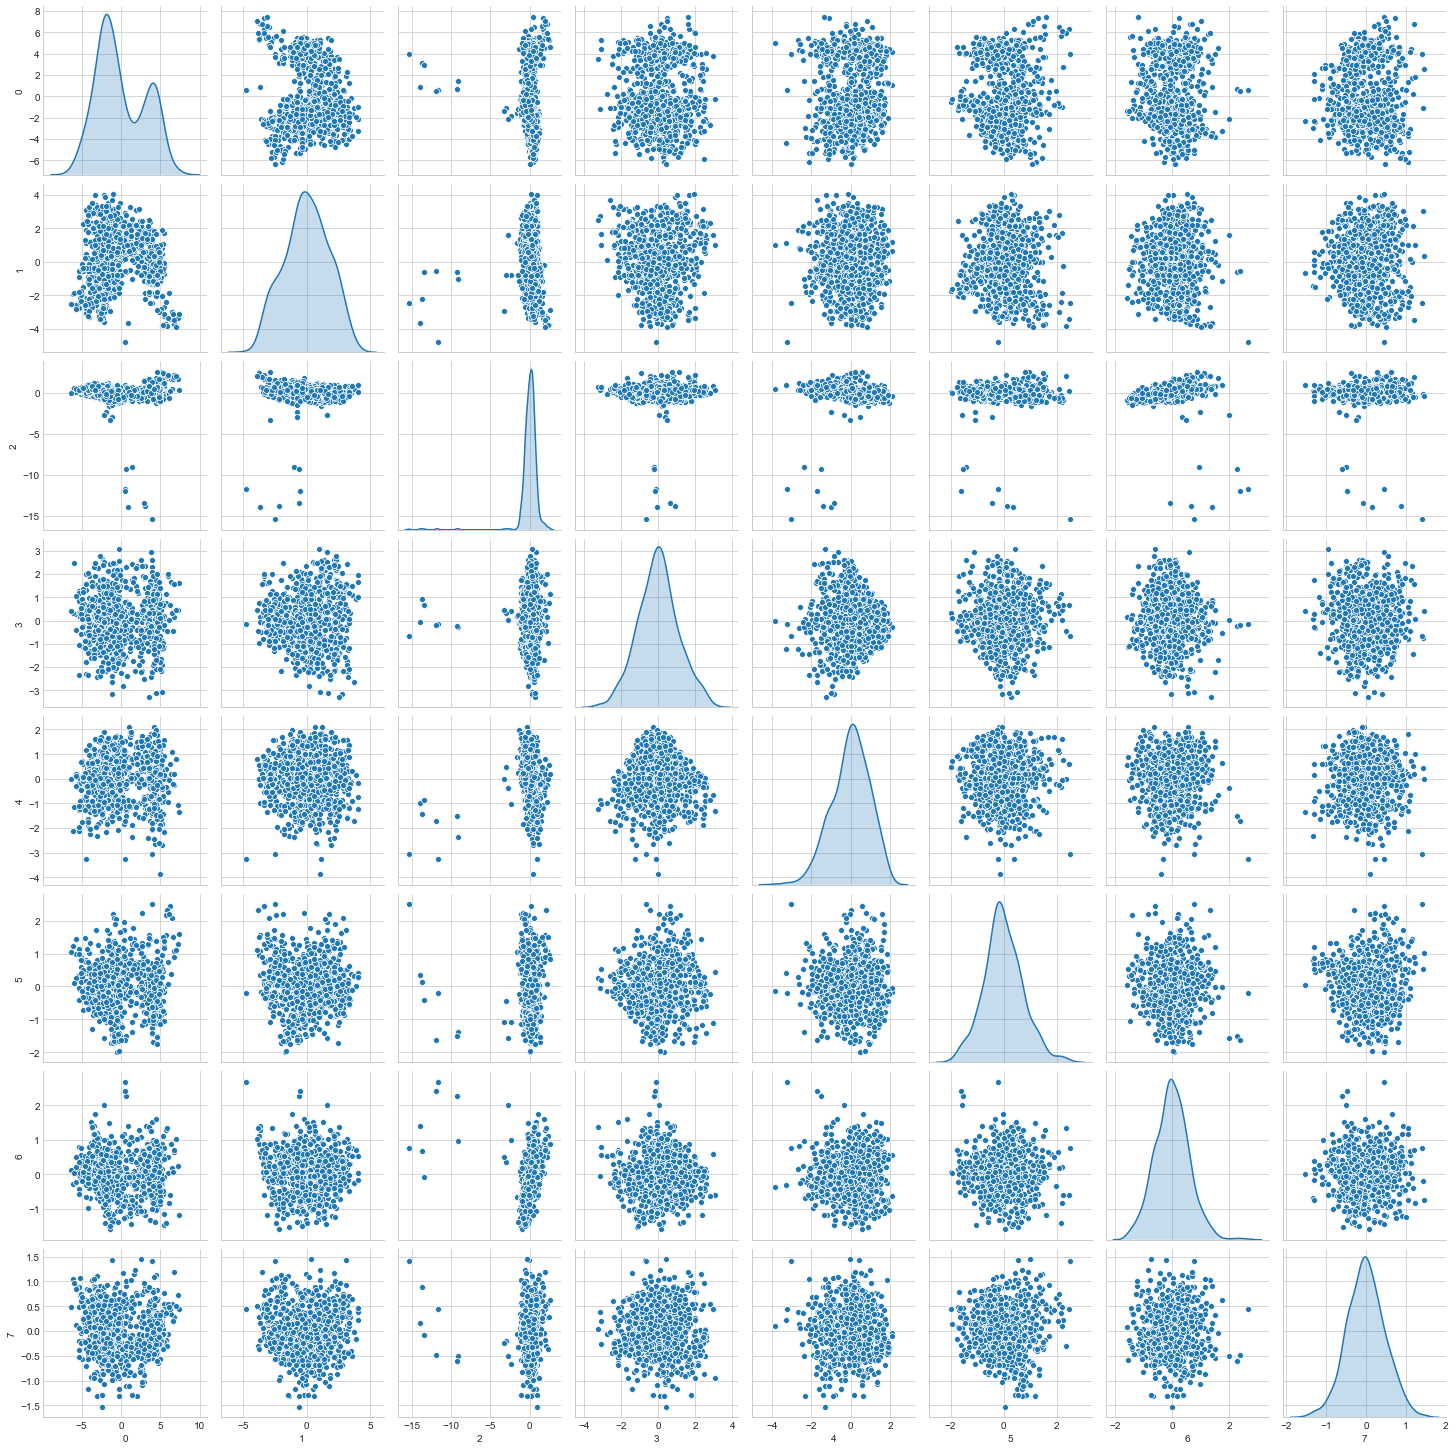

In [38]:
# Pairplot Of Reduced Dimensions After PCA
sns.pairplot(reduced_pca, diag_kind='kde')

##### Observation from above Pair Plot
After dimensionality reduction using PCA, the attributes have become independent with no correlation among themselves. As most of them have cloud of data points with no linear relationship

## 7. Fitting SVC Model and measuring accuracy scores using Principal Components

In [39]:
# Building Support Vector Classifier Model with the 8 new reduced variables constructed using PCA

# Spliting the dataset into training and test set in the ratio of 70:30
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,Y,test_size=0.30,random_state=1)

In [40]:
#Fitting the model on PCA data with new dimensions
svc1 = SVC()
svc1.fit(pca_X_train,pca_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
#predicting the y value
pca_y_predict = svc1.predict(pca_X_test)

In [42]:
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))
print("Accuracy score after PCA(On 8 dimensions)",accuracy_score(pca_y_test,pca_y_predict))

Model Score On Reduced PCA Dimension  0.937007874015748
Accuracy score after PCA(On 8 dimensions) 0.937007874015748


In [43]:
#Printing Confusion matrix 
print(metrics.confusion_matrix(pca_y_test,pca_y_predict))

[[ 57   1   1]
 [  2 126   5]
 [  5   2  55]]


In [44]:
# Performing K-fold cross validation using principal components
from sklearn.model_selection import KFold
pca_scores = []
pca_svc = SVC(kernel='rbf')
pca_cv = KFold (n_splits=10, random_state=1, shuffle=False)

for pcatrain_index, pcatest_index in pca_cv.split(X_std_8D):
   
    X_train, X_test, y_train, y_test = X_std_8D[pcatrain_index], X_std_8D[pcatest_index], Y[pcatrain_index], Y[pcatest_index]
    pca_svc.fit(X_train, y_train)
    pca_scores.append(pca_svc.score(X_test, y_test))
    
print(pca_scores)


[0.9294117647058824, 0.9647058823529412, 0.9529411764705882, 0.9529411764705882, 0.9294117647058824, 0.9764705882352941, 0.9285714285714286, 0.9285714285714286, 0.9523809523809523, 0.9523809523809523]


##### Observations
1. Accuracy score after PCA(On 8 dimensions) is: 0.937007874015748
2. The cross validation scores on Principal Components data after performing K-fold cross validation for K=10 :
The minimum accuracy score is 0.9285714285714286 and maximum accuracy score is 0.9764705882352941



## 8.Comparing the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components

##### SVM model Scores - Original Data (18 dimensions):

1. Accuracy Score On Original Data 0.952755905511811
2. The cross validation scores on original data after performing K-fold cross validation for K=10 is:  
   - Minimum accuracy score is 0.9411764705882353
   - Maximum accuracy score is 0.9882352941176471
3. Confusion Matrix:
 [[ 57   1   1]
 [  1 129   3]
 [  6   2  54]]


##### SVM model Scores -  Data using Principal Components (8 dimensions):
1. Accuracy score after PCA(On 8 dimensions) is: 0.937007874015748
2. The cross validation scores on Principal Components data after performing K-fold cross validation for K=10 : 
    - Minimum accuracy score is 0.9285714285714286 
    - Maximum accuracy score is 0.9764705882352941
3. Confusion Matrix:
[[ 57   1   1]
 [  2 126   5]
 [  5   2  55]]

### Conclusion:

Using support vector classifier: 
1. On raw dataset with 18 dimensions, the accuracy score without performing PCA is 95.27 %
2. On PCA components with only 8 dimensions(reduced dimensions) our model scored 93.70 %.

Considering that original dataframe had 18 dimensions, after PCA, dimensions got reduced to 8, SVM model has fared well in terms of accuracy score


###### Confusion Matrix Analysis on Original Data:

[[ 57   1   1]
 [  1 129   3]
 [  6   2  54]]

SVM model on original data set has correctly classified :
    - 57 van out of 59 actuals vans and has errored only in 2 cases
    - 129 cars out of 133 actual cars
    - 54 buses out of 62 actual buses

Wrong classification is minimal


###### Confusion Matrix Analysis on Reduced Dimenions After PCA :

[[ 57   1   1]
 [  2 126   5]
 [  5   2  55]]

SVM model on original data set has correctly classified :
    - 57 van out of 59 actuals vans
    - 126 cars out of 133 actual cars
    - 55 buses out of 62 actual buses

By using only 8 out of 18 dimensions, wrong classification is minimal and results are comparable with the one we got for original data